In [1]:
# import libraries for spatial data (geopandas), plotting (matplotlib.pyplot), network analysis (networkx)
# street network analysis (osmnx), and basemaps (contextily)

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# defining place, network type (walk v. bike), trip times, and mode speed
place = 'West Hollywood, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15] #in minutes
meters_per_minute = 75 #walking speed in meters per minute

In [3]:
%%time

# downloading street network using .graph_from_place
G = ox.graph_from_place(place, network_type=network_type)

CPU times: user 2.9 s, sys: 63.5 ms, total: 2.96 s
Wall time: 2.97 s


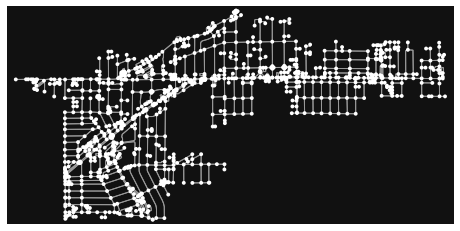

In [4]:
# plotting using osmnx
fig, ax = ox.plot_graph(G)

In [5]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [6]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [7]:
ints2 = ox.distance.nearest_nodes(G,Y=4040208.074389142,X=-13178455.01868442)
print('The ID for the nearest node is ' + str(ints2))

The ID for the nearest node is 1429174161


In [8]:
# using the lengths column (which is in meters) let's calculate and add another column for walk times
gdf_edges['walk_times'] = gdf_edges['length']/meters_per_minute

In [9]:
# adding colors to each trip time
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15]
['#0d0887', '#cc4778', '#f0f921']


In [10]:
# reversing order of colors so dark=long
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[15, 10, 5]
['#0d0887', '#cc4778', '#f0f921']


In [11]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(15, '#0d0887'), (10, '#cc4778'), (5, '#f0f921')]

In [12]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 15 minutes is #0d0887
The color for 10 minutes is #cc4778
The color for 5 minutes is #f0f921


In [13]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, ints2, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 470 nodes within 15 minutes 
There are 241 nodes within 10 minutes 
There are 54 nodes within 5 minutes 


In [14]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

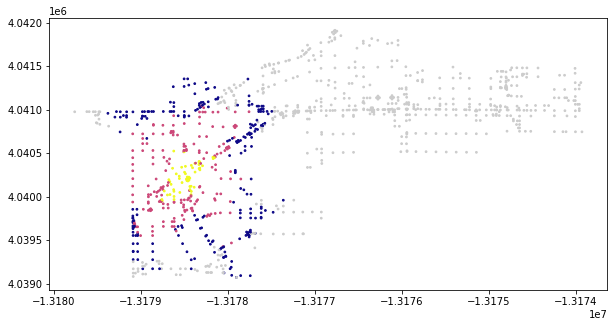

In [15]:
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

In [16]:
# show only the points within 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
122558529,4.040262e+06,-1.317859e+07,NaN,3,-118.385292,34.085301,POINT (-13178590.423 4040261.693),5 mins,#f0f921
122558531,4.040326e+06,-1.317863e+07,NaN,3,-118.385672,34.085779,POINT (-13178632.747 4040325.860),5 mins,#f0f921
2614047908,4.040208e+06,-1.317855e+07,NaN,4,-118.384970,34.084901,POINT (-13178554.600 4040207.888),5 mins,#f0f921
122966302,4.040194e+06,-1.317868e+07,NaN,3,-118.386057,34.084800,POINT (-13178675.627 4040194.246),5 mins,#f0f921
122706148,4.040524e+06,-1.317862e+07,traffic_signals,4,-118.385548,34.087251,POINT (-13178618.943 4040523.662),5 mins,#f0f921
5239881901,4.040516e+06,-1.317850e+07,NaN,3,-118.384469,34.087191,POINT (-13178498.762 4040515.651),5 mins,#f0f921
916327642,4.040338e+06,-1.317853e+07,NaN,3,-118.384733,34.085865,POINT (-13178528.173 4040337.500),5 mins,#f0f921
1429174165,4.040453e+06,-1.317817e+07,NaN,4,-118.381505,34.086725,POINT (-13178168.856 4040453.028),5 mins,#f0f921
3994594158,4.040172e+06,-1.317866e+07,NaN,3,-118.385958,34.084631,POINT (-13178664.595 4040171.611),5 mins,#f0f921


In [17]:
# put it in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

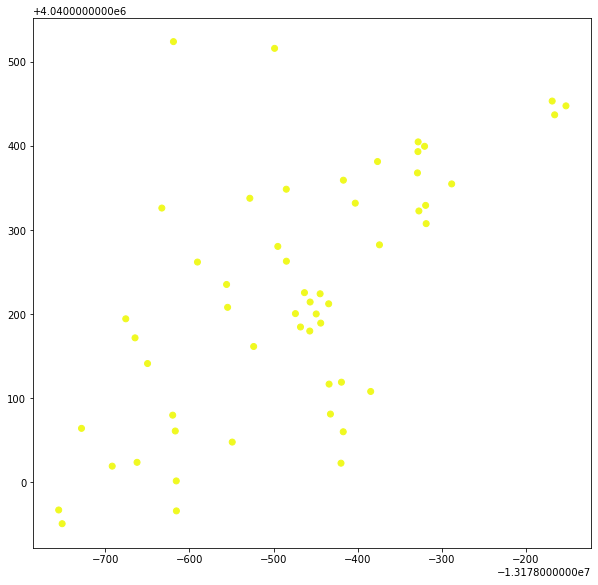

In [18]:
# plot it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

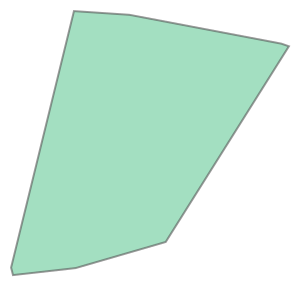

In [19]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

In [20]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,lon,lat,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13179091.416 4040020.562, -131790...",4.040930e+06,-1.317862e+07,stop,3,-118.385558,34.090275,#cc4778
15 mins,"MULTIPOINT (-13179375.882 4040957.424, -131792...",4.040979e+06,-1.317862e+07,traffic_signals,4,-118.385543,34.090635,#0d0887
5 mins,"MULTIPOINT (-13178755.332 4039967.055, -131787...",4.040262e+06,-1.317859e+07,traffic_signals,3,-118.385292,34.085301,#f0f921


In [21]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13178054.375 4039424.009, -13179000..."
1,15 mins,"POLYGON ((-13177899.029 4039071.763, -13178975..."
2,5 mins,"POLYGON ((-13178751.224 4039950.751, -13178755..."


In [22]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

<AxesSubplot:>

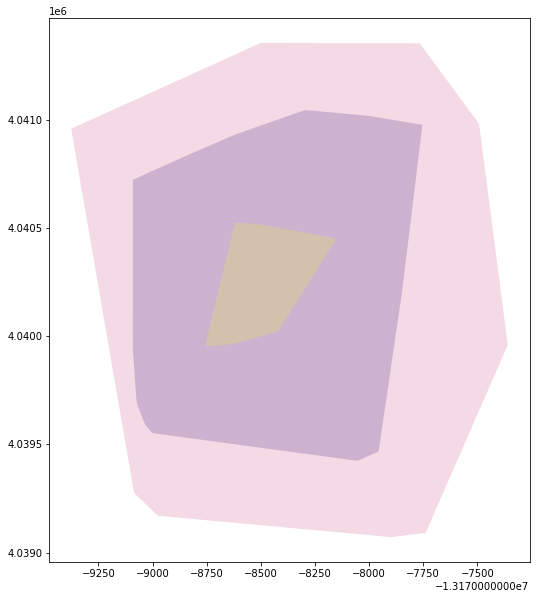

In [23]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

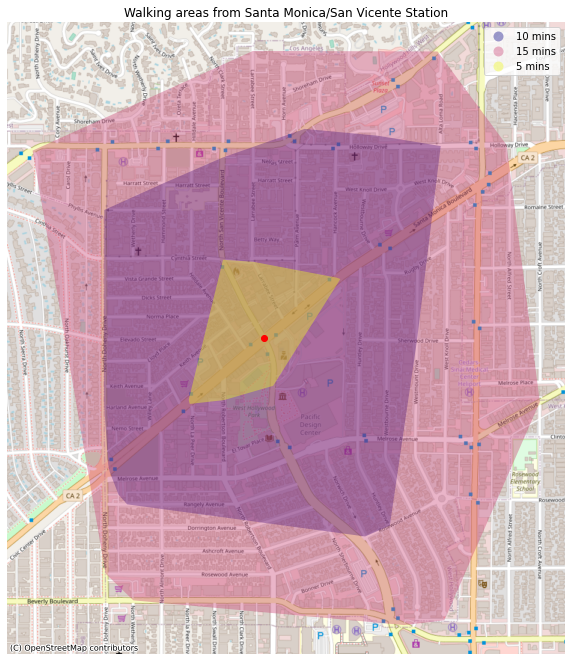

In [27]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[ints2]].plot(ax=ax,color='r', zorder=30)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from Santa Monica/San Vicente Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

#### Code for finding nodes nearest both stations
ints1 = ox.distance.nearest_nodes(G,Y=4039017.8956741537,X=-13177624.649093205) <br>
print('The ID for the nearest node is ' + str(ints1))<br>
ints2 = ox.distance.nearest_nodes(G,Y=4040208.074389142,X=-13178455.01868442)<br>
print('The ID for the nearest node is ' + str(ints2))